# House Price Prediction

## Techniques Used
### Logarithm to make it normal distribution
### Remove correlated features
### Remove unrelated features with target
### Drop Dominated Column
### Handling of missing values
### Drop columns with 50% missing values
### Standardization
### Principal Component Analysis
### Joining of Train and Test Data
### Dummy variable traping
### Pipelines of ML Models
### Random Forest
### XGBoost
### Hyperparameter Tuning
### Double Training (Train+Test as Train after first prediction)


In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from datetime import date
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# magic function
%matplotlib inline

In [3]:
# Getting the Current Date, which will be use to calculate how old the house is
today=date.today()

In [4]:
# setting the max rows and cols to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
# Reading the Train file and Test File and storing it in dataframe
df_train=pd.read_csv("train_h.csv")
df_test=pd.read_csv("test_h.csv")

In [6]:
# Display the first five rows of train
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Display the first five rows of test
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Skewness : 1.882876
Kurtosis : 6.536282


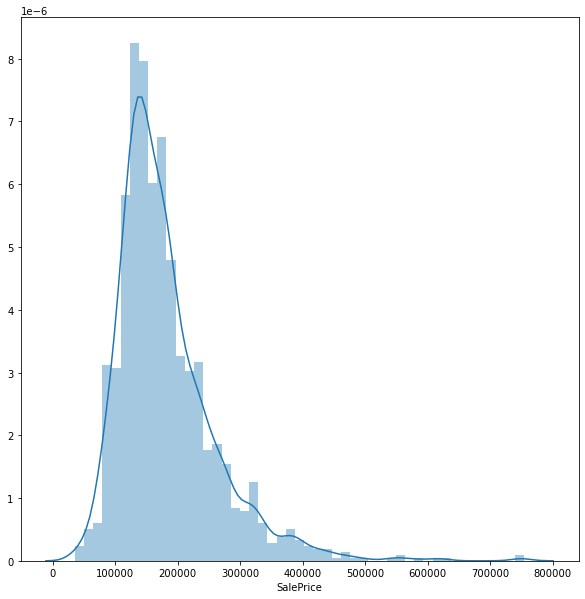

In [8]:
#Distribution of Sale Price
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df_train['SalePrice'])
# Skewness and Kurtosis of SalePrice
print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

In [9]:
#To make it Normal Distribution, we will take logarithm of Sale Price, Normal Distribution gives better prediction, 
#After prediction we will reverse it using exponential
df_train["SalePrice"] = np.log(df_train["SalePrice"])

Skewness : 0.121335
Kurtosis : 0.809532


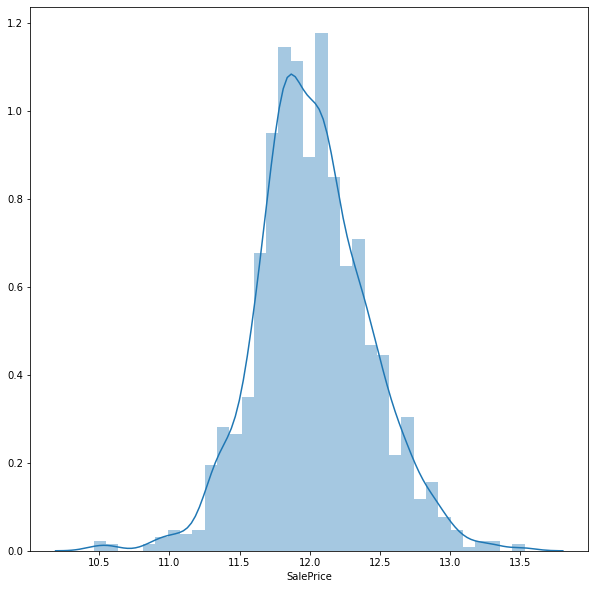

In [10]:
# After transfering the Sale Price to log value let us again check the distribution and skewness and kurtosis
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df_train['SalePrice'])
print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

In [11]:
#Year built, Year remodification is converted to how many year old etc
df_train["YearBuiltx"]=today.year-df_train["YearBuilt"]
df_train["YearRemodAddx"]=today.year-df_train["YearRemodAdd"]
df_train["GarageYrBltx"]=today.year-df_train["GarageYrBlt"]
#Year sold and Month sold is converted to total month passed till today from month of sold
df_train["MoSoldx"]=((today.year-df_train["YrSold"])*12+df_train["MoSold"])/12
# drop the original features
df_train.drop(["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold","MoSold"],axis=1,inplace=True)
# perform the above operation for test data also
df_test["YearBuiltx"]=today.year-df_test["YearBuilt"]
df_test["YearRemodAddx"]=today.year-df_test["YearRemodAdd"]
df_test["GarageYrBltx"]=today.year-df_test["GarageYrBlt"]
df_test["MoSoldx"]=((today.year-df_test["YrSold"])*12+df_test["MoSold"])/12
df_test.drop(["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold","MoSold"],axis=1,inplace=True)

Text(0.5, 1.0, 'Numerical Features Correlation with SalePrice')

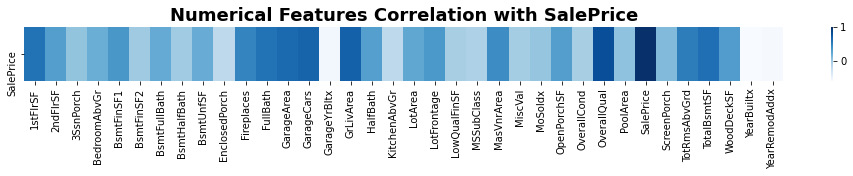

In [12]:
#check the correlation of target with numeric features
num=df_train.select_dtypes(exclude='object')
numcorr=num[num.columns.difference(["Id"])].corr()
fig, axes = plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap="Blues")
plt.title("Numerical Features Correlation with SalePrice", weight='bold', fontsize=18)

In [13]:
#display the correlation of SalePrice with all numerical features in descending order
df=numcorr["SalePrice"].sort_values(ascending=False).to_frame()
print(df)

               SalePrice
SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
TotRmsAbvGrd    0.534422
Fireplaces      0.489449
MasVnrArea      0.430809
BsmtFinSF1      0.372023
LotFrontage     0.355878
WoodDeckSF      0.334135
OpenPorchSF     0.321053
2ndFlrSF        0.319300
HalfBath        0.313982
LotArea         0.257320
BsmtFullBath    0.236224
BsmtUnfSF       0.221985
BedroomAbvGr    0.209044
ScreenPorch     0.121208
PoolArea        0.069798
3SsnPorch       0.054900
MoSoldx         0.045252
BsmtFinSF2      0.004832
BsmtHalfBath   -0.005149
MiscVal        -0.020021
OverallCond    -0.036868
LowQualFinSF   -0.037963
MSSubClass     -0.073959
KitchenAbvGr   -0.147548
EnclosedPorch  -0.149050
GarageYrBltx   -0.541073
YearRemodAddx  -0.565608
YearBuiltx     -0.586570


In [16]:
#from the above table we can observe that SalePrice is positively related to OverallQual, GrLivArea, GarageCars and GarageArea
#and negetively related to YearBuiltx, YearRemodAddx and GarageYrBltx 
#dropping the less correlated field from train and test dataframe, 
#we are droping attributes whose correcation is within range 0.1 to -0.1
index_names = df[ np.abs(df['SalePrice']) < 0.1 ].index 
#drop these row indexes from dataFrame 
df_train.drop(index_names, axis=1, inplace = True)
df_test.drop(index_names, axis=1, inplace = True)

In [19]:
#check the shape of train and test data
print(df_train.shape)
print(df_test.shape)

(1460, 71)
(1459, 70)


In [17]:
#remove the source column of calculative field
#df_train.drop(["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF"],axis=1,inplace=True)
#df_test.drop(["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF"],axis=1,inplace=True)
#But as droping the source field not giving good accuracy, I commented it for the time
#we can also check the accuracy by droping the calculative fields

In [20]:
#treatment of null values
print("Null Values in Train Data")
print(df_train.isnull().sum())

Null Values in Train Data
Id                  0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
Bedroo

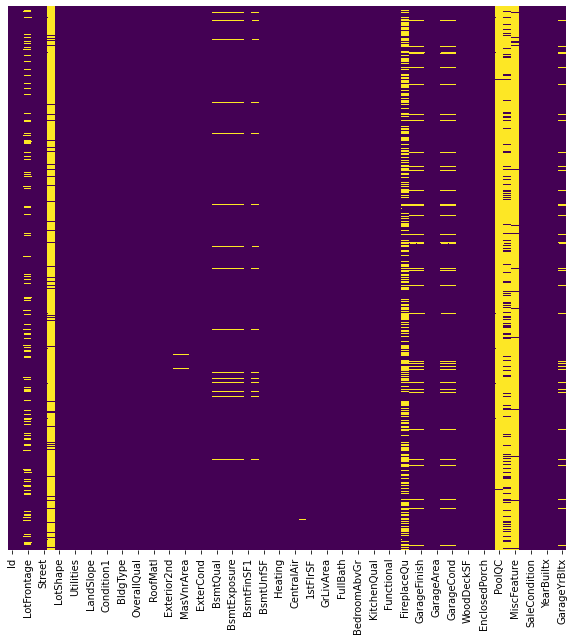

In [21]:
#check the null valus using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [22]:
#print("Columns having at least one Null Values")
column_with_nan = df_train.columns[df_train.isnull().any()]
print(column_with_nan)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBltx'],
      dtype='object')


In [23]:
#drop columns with 50% missing values
col_list_with_50_per_null=[]
for column in column_with_nan:
    if df_train[column].isnull().sum()/df_train.shape[0]*100>50:
        #add the droping columns to the list so that it can be used to drop the same features from test data
        col_list_with_50_per_null.append(column)
        df_train.drop(column,axis=1, inplace=True)
#drop the same columns from test data as well
df_test.drop(col_list_with_50_per_null,1, inplace=True) 

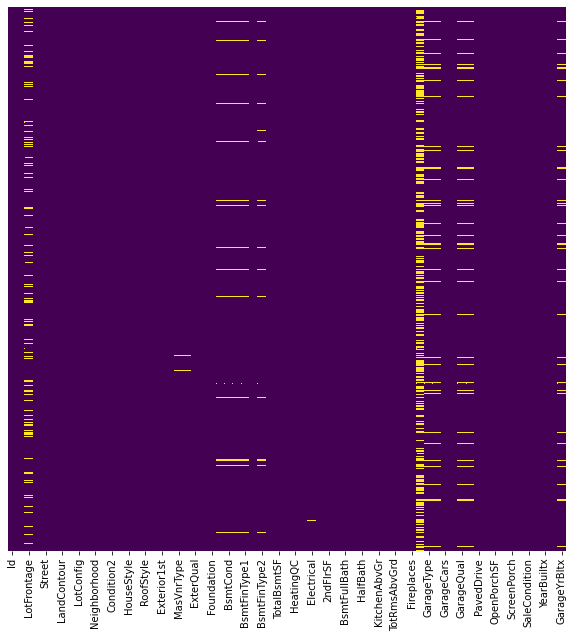

In [24]:
#check the null valus using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [25]:
#storing the categorical cols and numeric cols separately
cat_cols=df_train.select_dtypes(include=['object', 'category']).columns
num_cols=df_train._get_numeric_data().columns
#print categorival cols and numerical cols
print("Categorical Columns")
print(cat_cols)
print("Numerical Columns")
print(num_cols)

Categorical Columns
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns
Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorc

In [26]:
#filling the null values in categorical cols with mode and numerical cols with mean
column_with_nan = df_train.columns[df_train.isnull().any()]
for column in column_with_nan:
    if column in cat_cols:
        df_train[column].fillna(df_train[column].mode()[0],inplace=True)
    if column in num_cols:
        df_train[column].fillna(df_train[column].mean(),inplace=True)

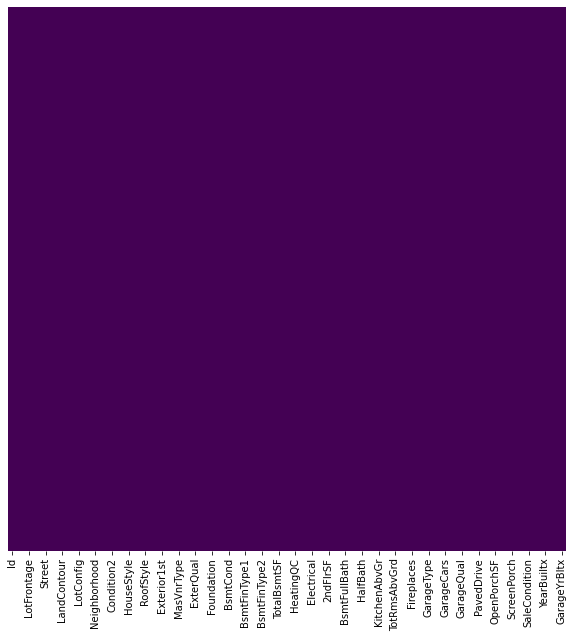

In [27]:
#check the null valus using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [28]:
#repeat the same thin for test data as well
column_with_nan = df_test.columns[df_test.isnull().any()]
for column in column_with_nan:
    if column in cat_cols:
        df_test[column].fillna(df_test[column].mode()[0],inplace=True)
    if column in num_cols:
        df_test[column].fillna(df_test[column].mean(),inplace=True)

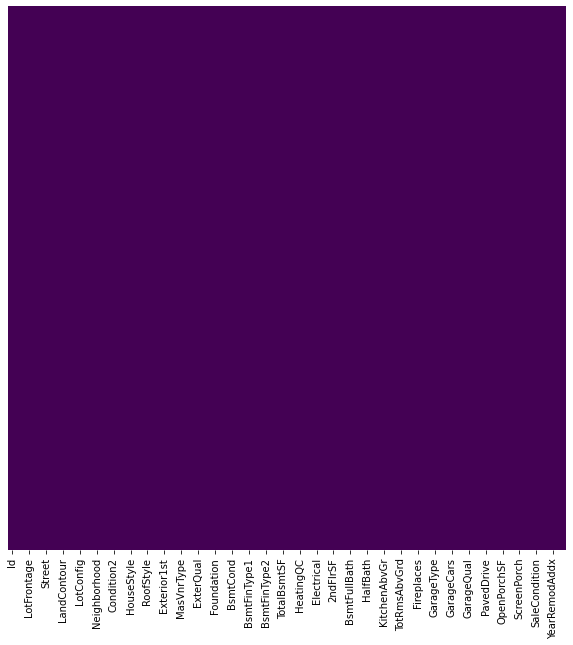

In [29]:
#check the null values of test data using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

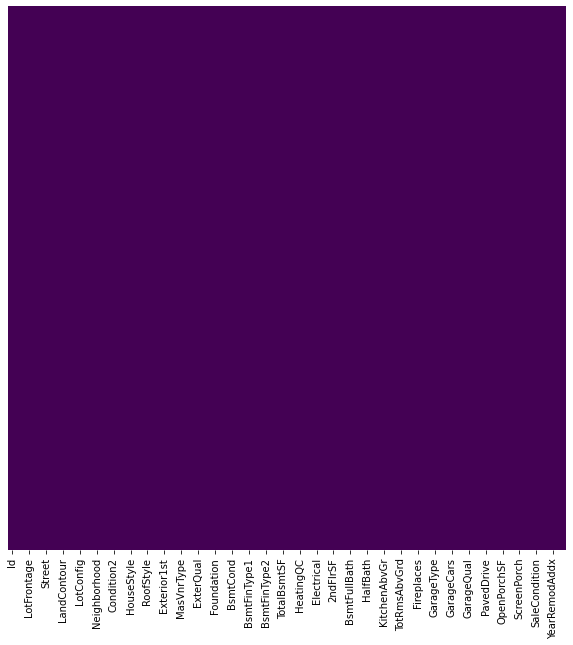

In [30]:
#Handling Categorical Data
#Combine the train and test data first
frames = [df_train, df_test]
final = pd.concat(frames)
#drop the target column
final.drop("SalePrice",axis=1,inplace=True)
#confirm non existance of null values using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(final.isnull(),yticklabels=False,cbar=False,cmap="viridis")

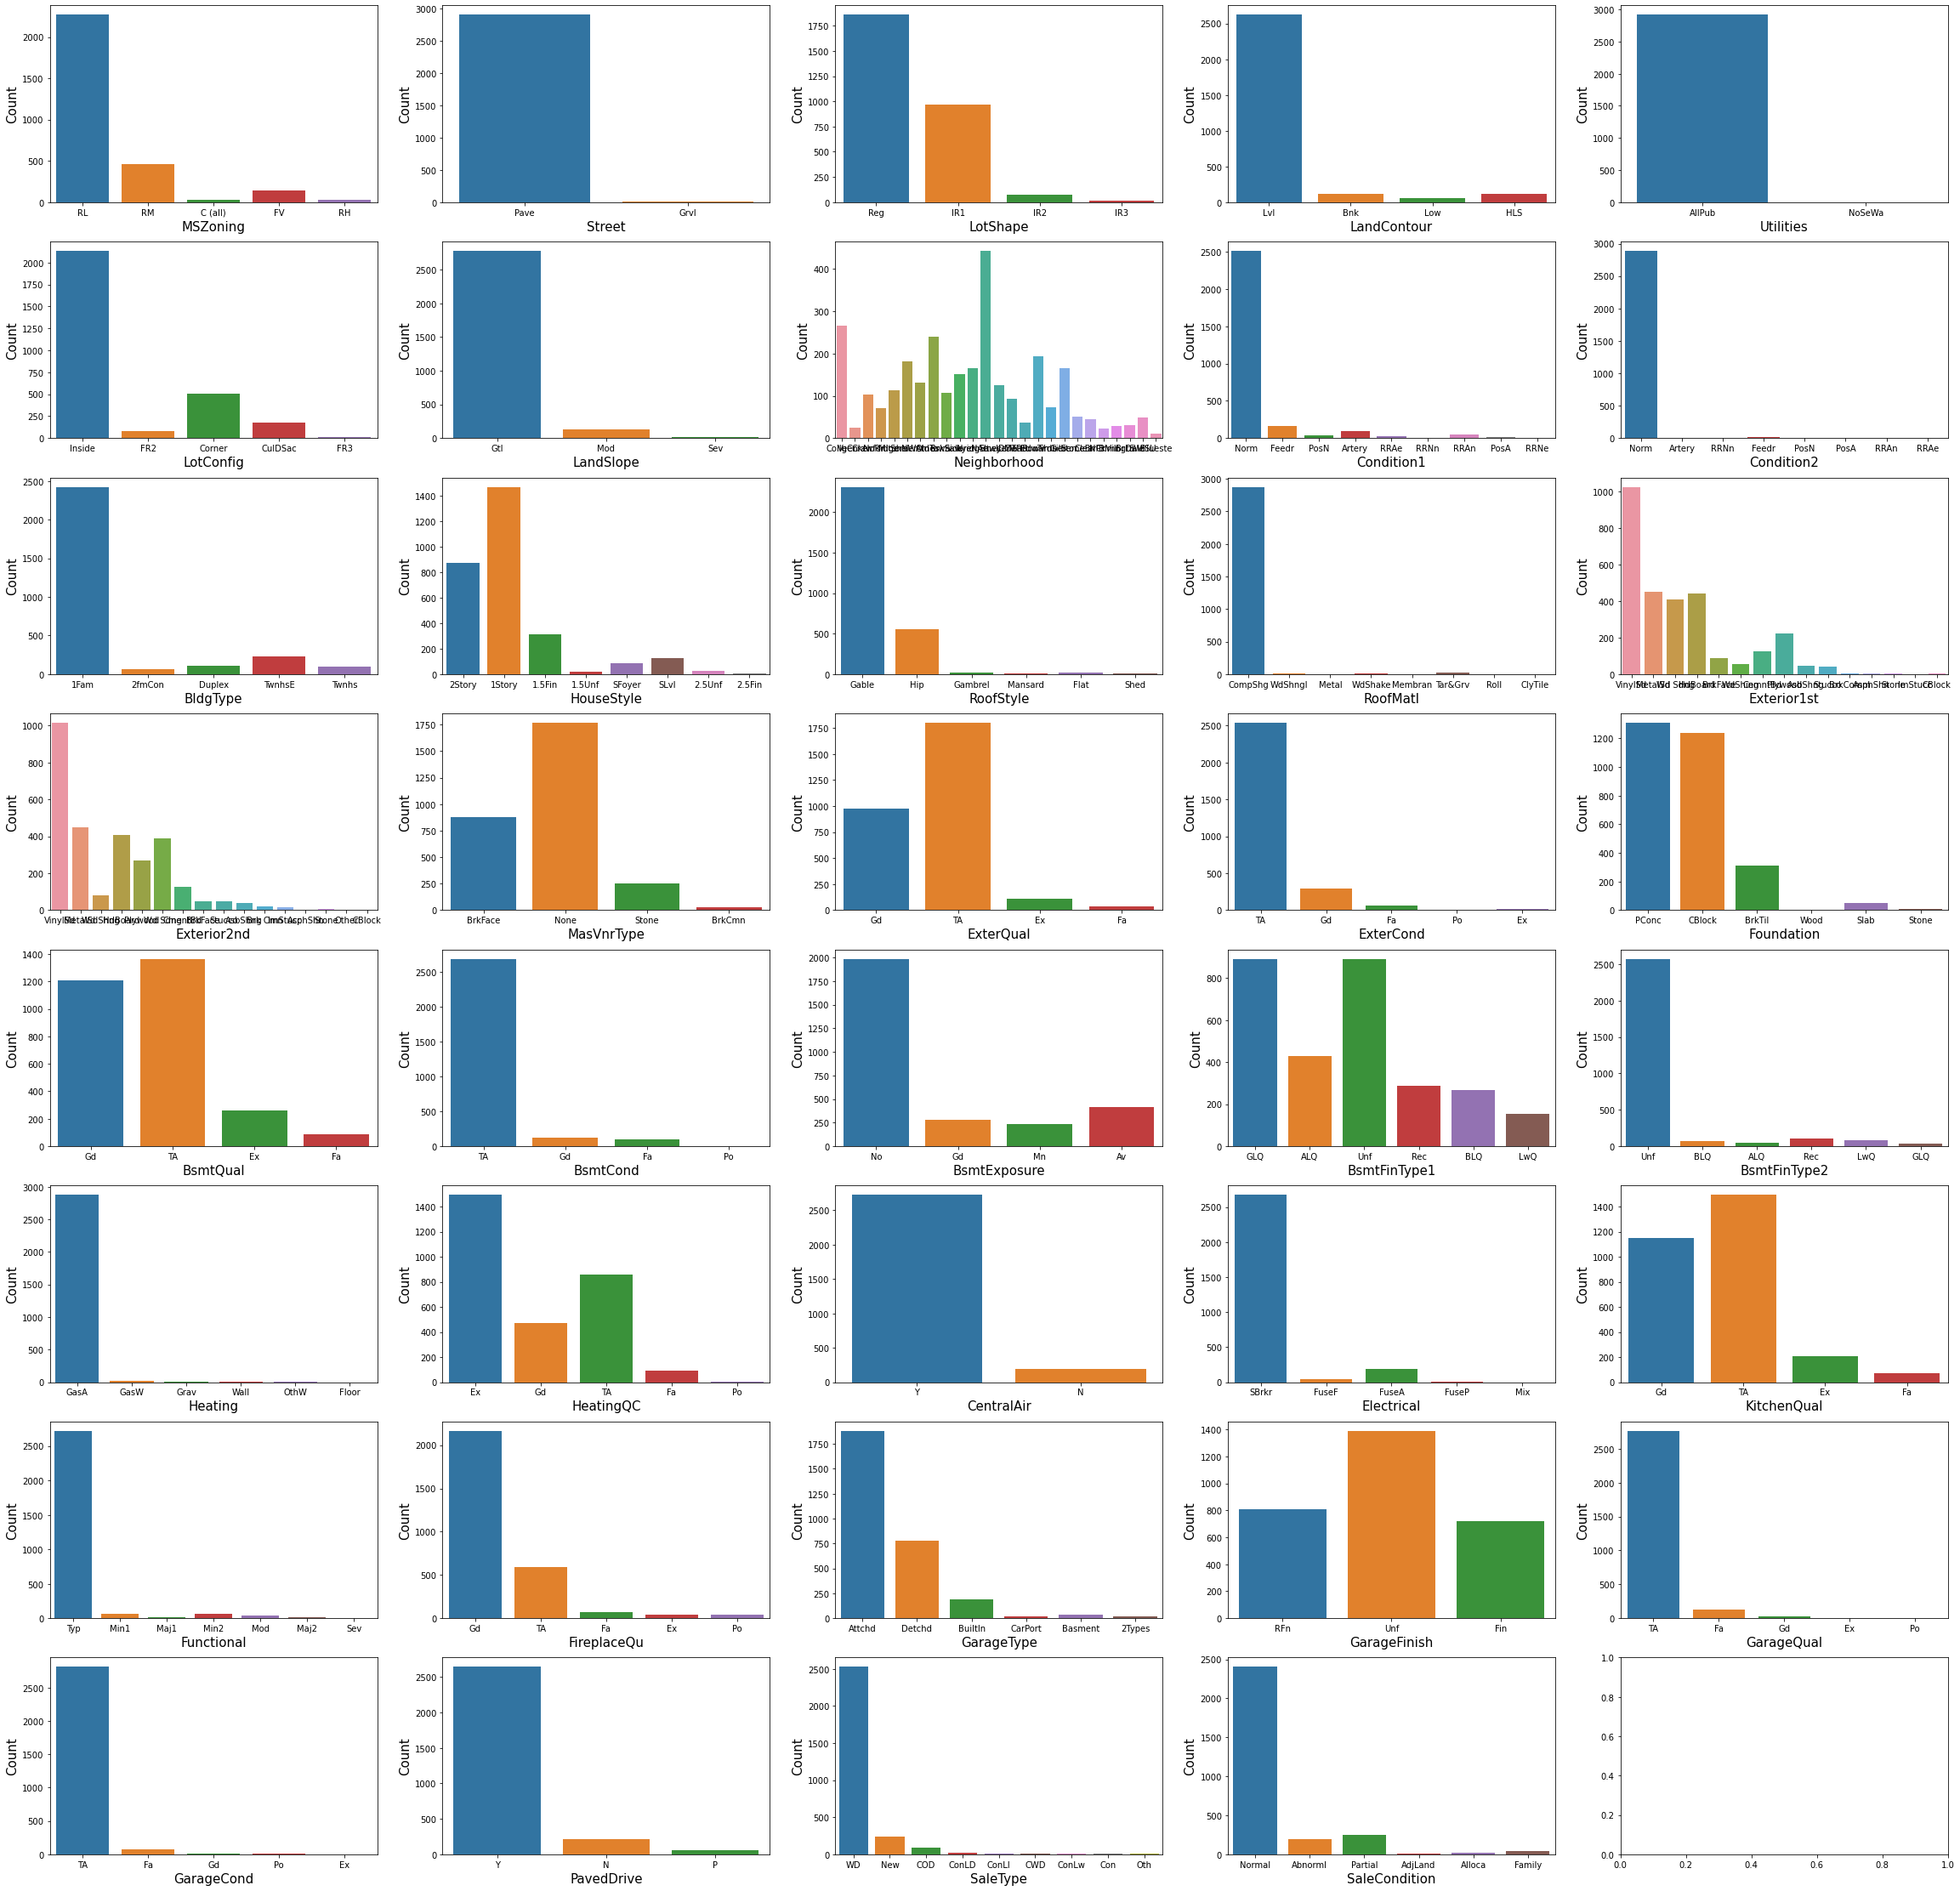

In [31]:
#check for the categorical features which are dominated by one value
fig, axes = plt.subplots(8, 5, figsize=(40, 40))
len_cat_cols=len(cat_cols)
for i in range(8):
    for j in range(5):
        m = i*5+j
        if m < len_cat_cols:
            sns.countplot(x=cat_cols[m], data=final, ax=axes[i, j])
            axes[i][j].set_ylabel('Count', fontsize=15)
            axes[i][j].set_xlabel(cat_cols[m], fontsize=15)

In [32]:
#drop features where one value occurs more than 90%, these features are not going to help in model building
cl=[]
for col in final.columns:
    x=final[col].value_counts(normalize=True)
    if (x > 0.9).any():
        cl.append(col)
#print(cl)
final.drop(cl,axis=1,inplace=True)

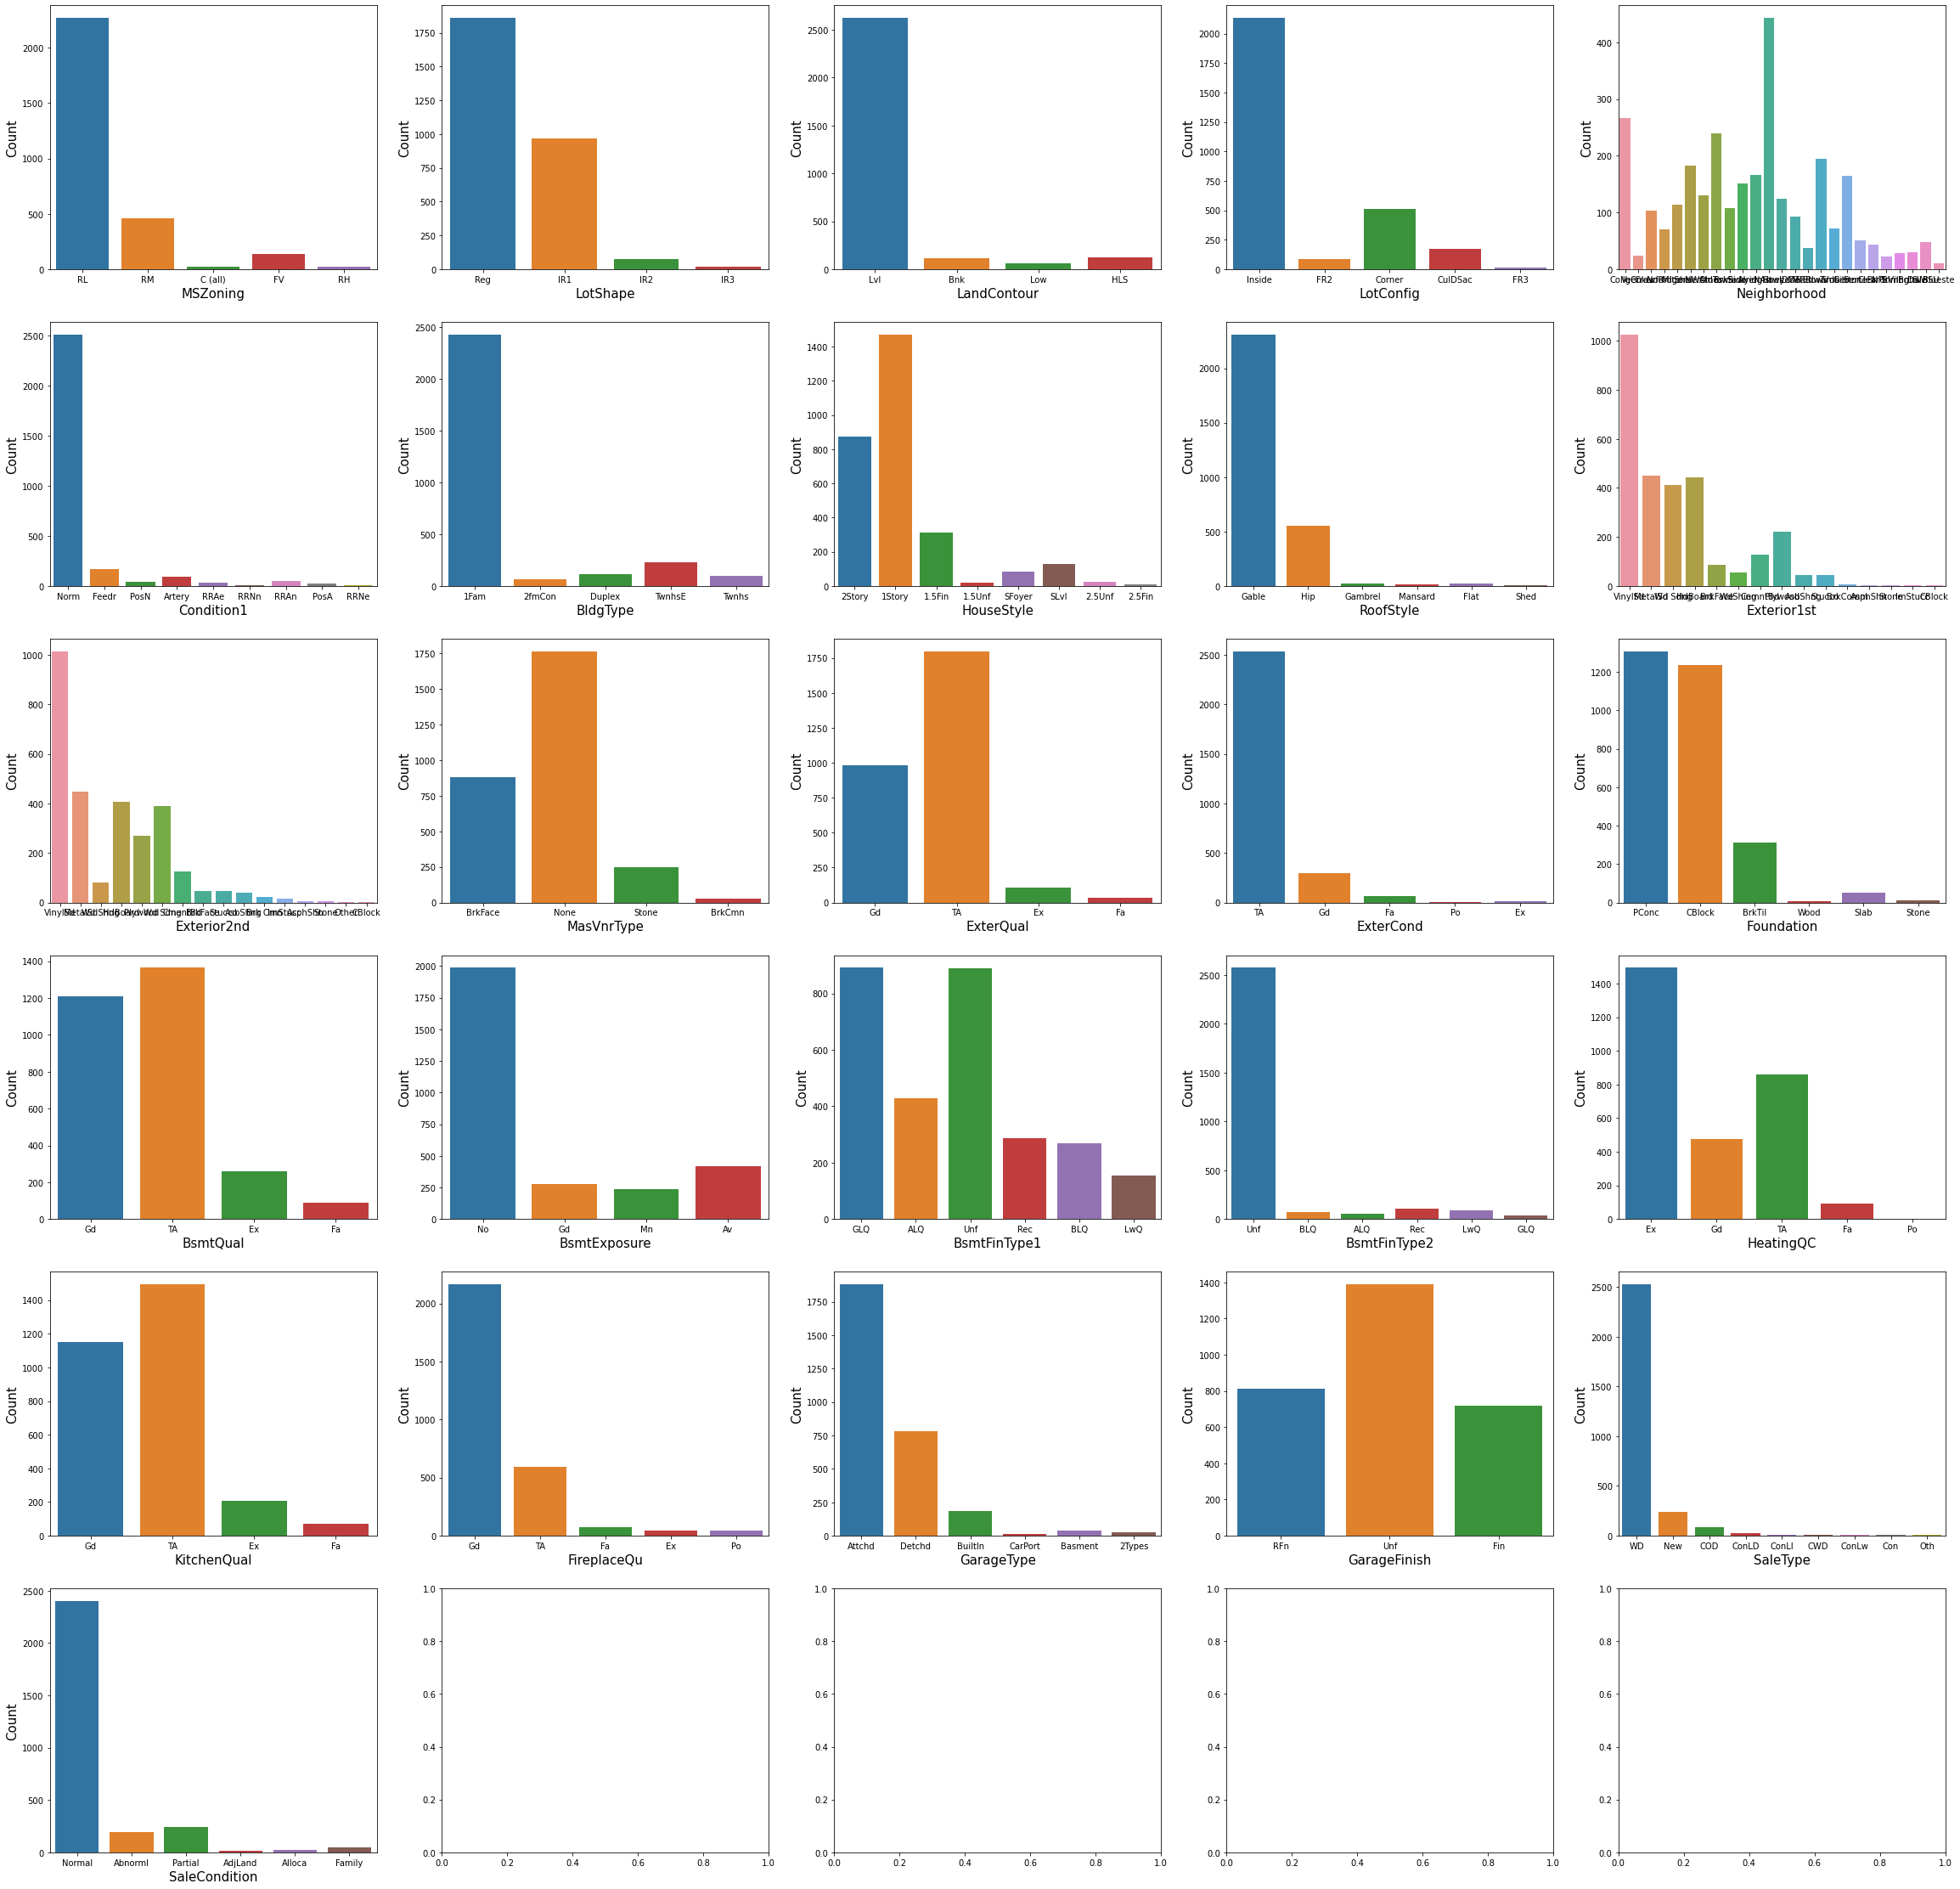

In [33]:
#Recheck for the categorical features which are dominated by one value
cat_cols=final.select_dtypes(include=['object', 'category']).columns
num_cols=final._get_numeric_data().columns
#Check the distribution of categorical data using count plot
fig, axes = plt.subplots(6, 5, figsize=(40, 40))
len_cat_cols=len(cat_cols)
for i in range(6):
    for j in range(5):
        m = i*5+j
        if m < len_cat_cols:
            sns.countplot(x=cat_cols[m], data=final, ax=axes[i, j])
            axes[i][j].set_ylabel('Count', fontsize=15)
            axes[i][j].set_xlabel(cat_cols[m], fontsize=15)


In [34]:
#Identify Columns with more than 6 categories and replace rare occurance with some constant like NA+Seventh value
for col in final:
    if col in cat_cols:
        if final[col].nunique()>6:
            li=[]
            for i in range(6,final[col].nunique()):
                li.append(final[col].value_counts().index[i])
            final[col].replace(li,"NA"+final[col].value_counts().index[5],inplace=True)

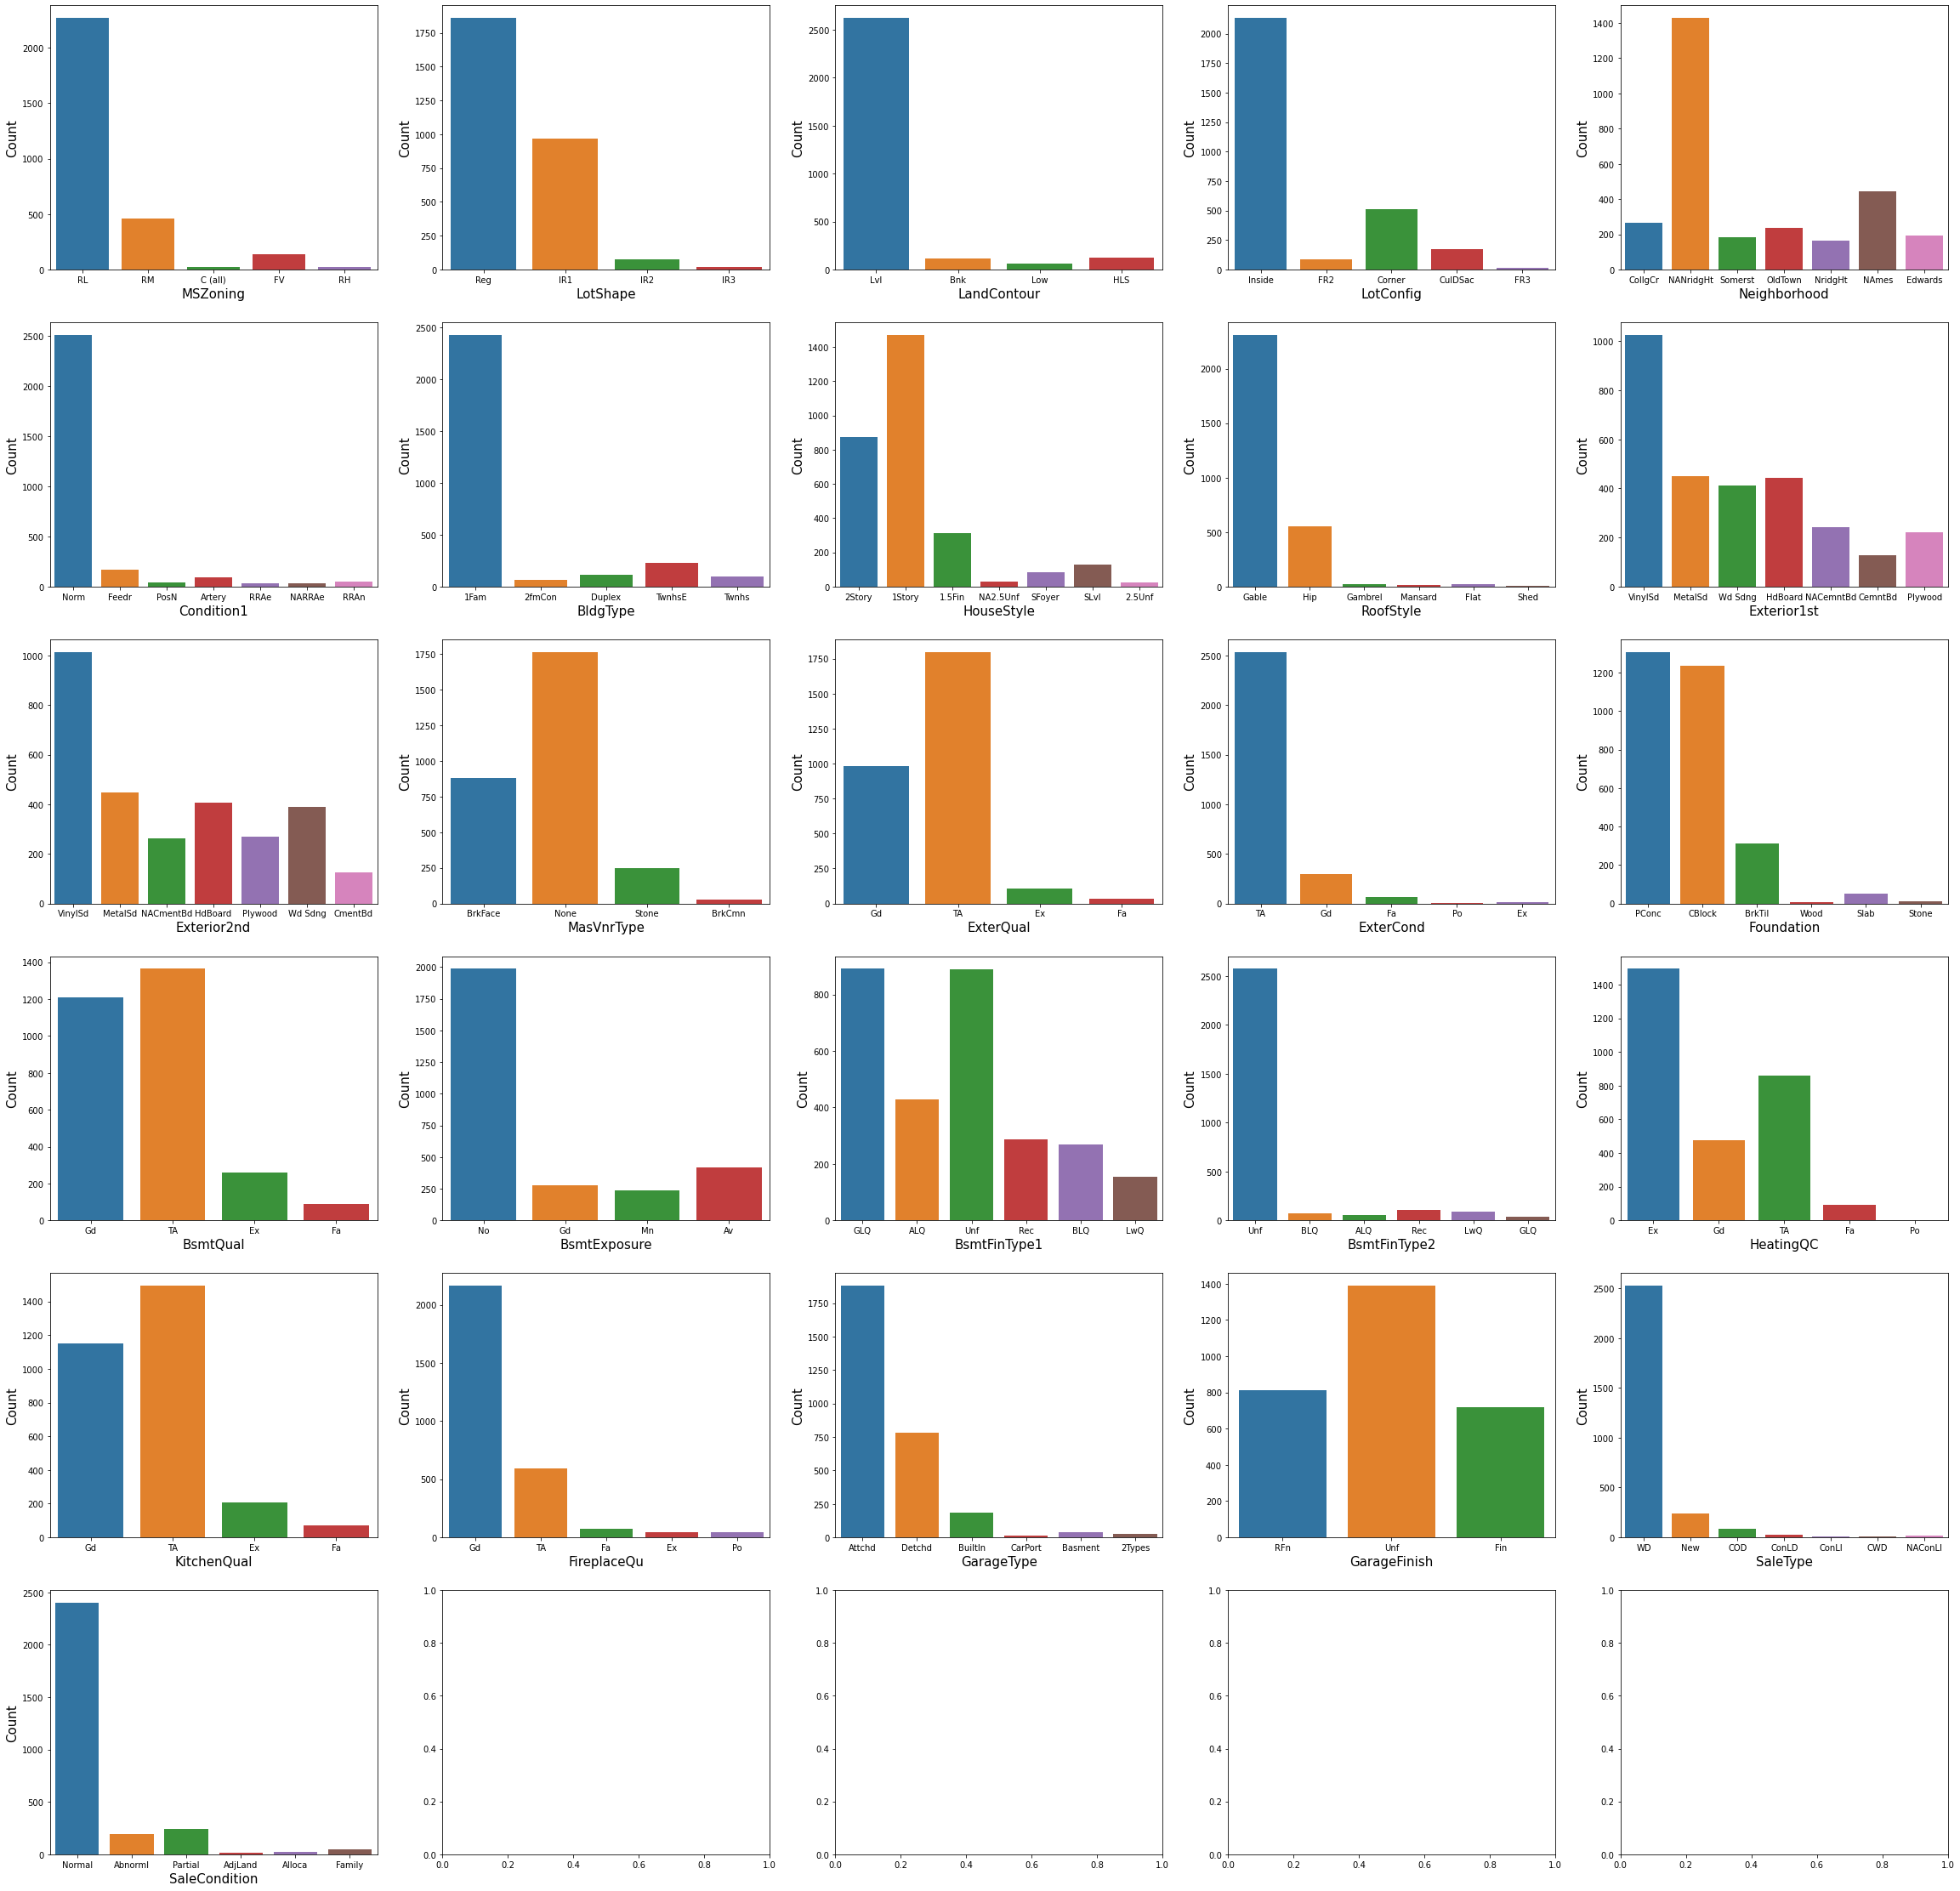

In [35]:
#Check the distribution of categorical data using count plot
fig, axes = plt.subplots(6, 5, figsize=(40, 40))
for i in range(6):
    for j in range(5):
        m = i*5+j
        if m < len_cat_cols:
            sns.countplot(x=cat_cols[m], data=final, ax=axes[i, j])
            axes[i][j].set_ylabel('Count', fontsize=15)
            axes[i][j].set_xlabel(cat_cols[m], fontsize=15)

In [36]:
#Check the shape of the data
final.shape

(2919, 51)

In [37]:
#Create dummy variables for categorical data using pandas dummy variable trap method
dummy=pd.get_dummies(data=final, columns=cat_cols)
#add dummy features to the original data column wise, drop the original features for which dummy is created, 
#then delete the duplicate columns if any
data = pd.concat([final, dummy], axis = 1)
data.drop(cat_cols,axis=1,inplace=True)
data=data.T.drop_duplicates().T
#check the shape of data
data.shape

(2919, 164)

In [38]:
#drop id, id is neither use for any correlation nor for machine learning
data.drop("Id",axis=1, inplace=True)
print(data.shape)

(2919, 163)


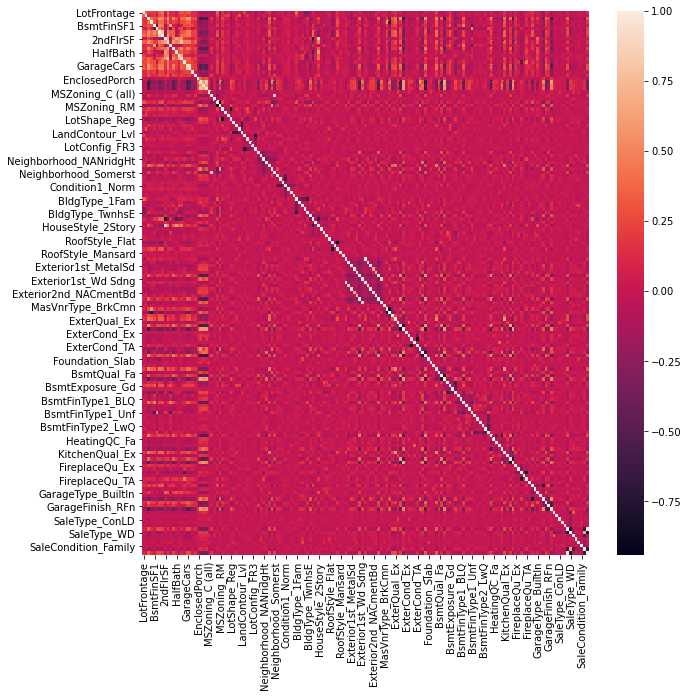

In [39]:
#remove corelated columns, if two features are 90%(0.9) correlated then we will drop one out of them 
threshold=0.90
col_corr=set()
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_matrix)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i,j]>=threshold) and (corr_matrix.columns[j] not in col_corr):
            colname = corr_matrix.columns[i]
            col_corr.add(colname)
            if colname in data.columns:
                del data[colname]

In [40]:
#check how many corelated features are removed
data.shape

(2919, 159)

In [41]:
#Standardization and PCA(Principal Component Analysis)
data = StandardScaler().fit_transform(data)
data=PCA(n_components="mle", svd_solver="full").fit_transform(data)
data=pd.DataFrame(data)
print(data.shape)

(2919, 135)


In [42]:
#finalize the X_train,y_train and X_test
X_train=data.iloc[:1460,:]
X_test=data.iloc[1460:,:]
y_train=df_train["SalePrice"]

## Train the model

In [ ]:
#Here we can create pipelines for different models which are trained of trained data and we took the 
#average of all the predictions, If we want to take only one model we will take a single pipeline
pipeline_xgb=Pipeline([('xgb_regressor',XGBRegressor())])
pipeline_rf=Pipeline([('rf_regressor',XGBRegressor())])
pipelines = [pipeline_xgb,pipeline_rf]
#define the parameters for the model selected for training
param_grid = [
    dict({
     'xgb_regressor__n_estimators': [130,150],
     'xgb_regressor__max_depth':[1,2,3],
     'xgb_regressor__learning_rate':[0.1,0.25,0.3,0.5],
     'xgb_regressor__min_child_weight':[1,2],
     'xgb_regressor__booster':['gbtree','gblinear'],
     }),
    
    dict({
      "rf_regressor__n_estimators" : [10,50,100],
      "rf_regressor__max_features" : ["auto", "log2", "sqrt"],
      "rf_regressor__bootstrap"    : [True, False]
        })
    ]

pipe_dict = { 0: 'XGBoost', 1:'RandomForest'}
best_models=[]
submission= pd.DataFrame({'Id' : df_test['Id']})
i=0
for pipe in pipelines:
    gridsearch = GridSearchCV(pipe, param_grid=param_grid[i], cv=5, verbose=1,n_jobs=-1,refit=True,return_train_score=True)
    model=gridsearch.fit(X_train, y_train)
    print(gridsearch.best_params_)
    #model is trained using best parameters of a particular model 
    y_predicted = model.predict(X_test)
    submission[pipe_dict[i]] = y_predicted
    best_models.append(model)
    i=i+1
#aggregating both the predictions
submission['SalePrice']=(submission['XGBoost']+submission['RandomForest'])/2
submission.drop("XGBoost",axis=1,inplace=True)
submission.drop("RandomForest",axis=1,inplace=True)

In [ ]:
#Retrain the model by train+test as train and again predict for actual test data
X_test_actual=X_test
frames = [y_train, submission['SalePrice']]
y_train = pd.concat(frames)
X_train=data
submission= pd.DataFrame({'Id' : df_test['Id']})
i=0
for pipe in pipelines:
    gridsearch = GridSearchCV(pipe, param_grid=param_grid[i], cv=5, verbose=1,n_jobs=-1,refit=True,return_train_score=True)
    model=gridsearch.fit(X_train, y_train)
    print(gridsearch.best_params_)
    y_predicted = model.predict(X_test_actual)
    submission[pipe_dict[i]] = y_predicted
    best_models.append(model)
    i=i+1
submission['SalePrice']=(np.exp(submission['XGBoost'])+np.exp(submission['RandomForest']))/2
submission.drop("XGBoost",axis=1,inplace=True)
submission.drop("RandomForest",axis=1,inplace=True)    
submission.to_csv("sub8.csv",index=False)
print("Completed")

In [ ]:
#after submitting these predictions to kaggle site, the rmse is around 0.14. Rank is around 3000, Outlier handling is not done 
#here. If we handle the outlier I believe the score can be further improved.
#Thank you